In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
YEAR = 2023
TARGET = '수신잔고'

cs = pd.read_csv(f"../dataset/imbank_customer_data/customer_newCols_{YEAR}.csv", encoding = 'euc-kr')

cs_churn=cs[cs['이탈여부']=='이탈']
cs_non = cs[cs['이탈여부']=='유지']

# 이상치 비율 확인
# 1분위
q1_churn = cs_churn[cs_churn['이탈여부']=='이탈'][TARGET].quantile(q=0.25)
# 3분위
q3_churn = cs_churn[cs_churn['이탈여부']=='이탈'][TARGET].quantile(q=0.75)
IQR =  q3_churn - q1_churn

q1 = cs_non[[TARGET]].quantile(q=0.25)
q3 = cs_non[[TARGET]].quantile(q=0.75)

In [11]:
q3

수신잔고    5400000.0
Name: 0.75, dtype: float64

In [ ]:
q3_churn # 2600000

np.float64(2600000.0)

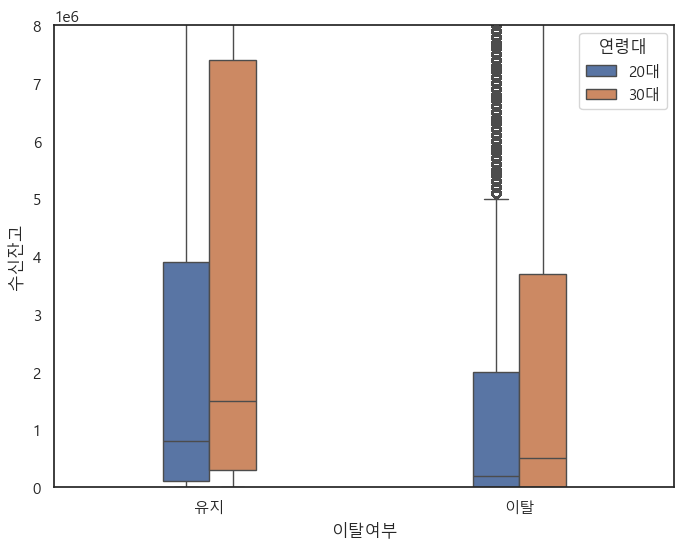

In [13]:
# 간단한 box plot 그리기
# 시각화 그리기 한글폰트 가가
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

fig, ax = plt.subplots(figsize = (8, 6))
filtered_data = cs[cs['연령대'].isin(['20대', '30대'])]
sns.boxplot(filtered_data, x = '이탈여부', y = TARGET, width=0.3, hue='연령대')
plt.ylim(0, 8000000)
plt.show()